<a href="https://colab.research.google.com/github/DanielPopoola/data-science-projects/blob/main/CNNwithTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/Projects/data-science-projects')

In [2]:
import tensorflow
from tensorflow import keras

print('Tensorflow version:',tensorflow.__version__)
print('Keras version:', keras.__version__)

Tensorflow version: 2.12.0
Keras version: 2.12.0


3 classes:
['circle', 'square', 'triangle']


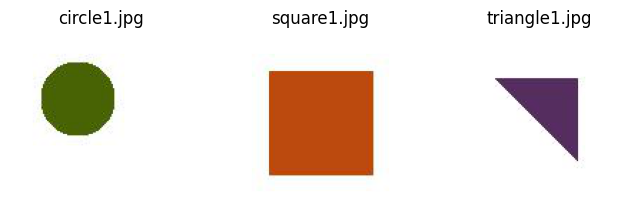

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# The images are in the data/shapes folder
data_folder = 'datasets/shapes'

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 30

print('Getting ready...')
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.3)

print('Preparing training dataset')
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size= img_size,
    batch_size= batch_size,
    class_mode= 'categorical',
    subset='training'
)

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting ready...
Preparing training dataset
Found 840 images belonging to 3 classes.
Preparing validation dataset...
Found 360 images belonging to 3 classes.
Data generators ready


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define model as a sequence of layers
model = Sequential()

model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (6,6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (6,6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 32)        36896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0

In [7]:
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data= validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs
)

Epoch 1/5
28/28 [==============================] - 251s 9s/step - loss: 0.7673 - accuracy: 0.5857 - val_loss: 0.3541 - val_accuracy: 0.8028
Epoch 2/5
28/28 [==============================] - 57s 2s/step - loss: 0.2009 - accuracy: 0.9131 - val_loss: 0.0934 - val_accuracy: 0.9583
Epoch 3/5
28/28 [==============================] - 52s 2s/step - loss: 0.0362 - accuracy: 0.9917 - val_loss: 0.0067 - val_accuracy: 0.9972
Epoch 4/5
28/28 [==============================] - 57s 2s/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 0.0054 - val_accuracy: 0.9972
Epoch 5/5
28/28 [==============================] - 57s 2s/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0094 - val_accuracy: 1.0000


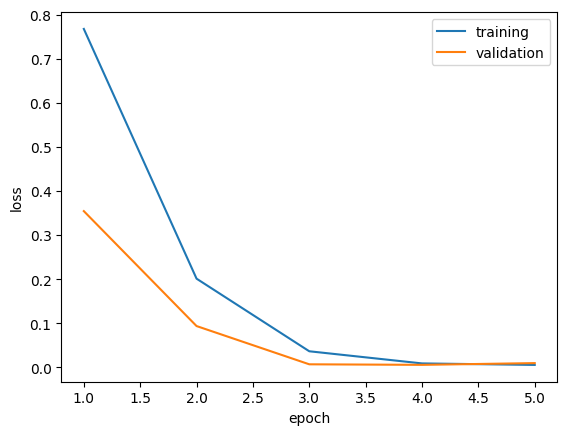

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 [==============================] - 1s 601ms/step


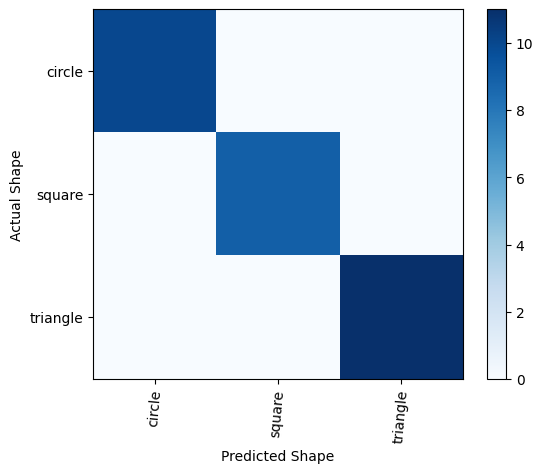

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

In [10]:
# Save the trained model
modelFileName = 'models/shape_classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/shape_classifier.h5
